In [6]:
from google.colab import drive
drive.mount('/content/drive')

!pip install openai
!pip install wordcloud
!pip install transformers

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 9.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Dependencies 

In [7]:
# OepnAI
import openai

# General
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# DL
import tensorflow as tf
from tensorflow import keras

# Transformers
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM


# NLP
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer

import string
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# OpenAI

In [8]:
openai.api_key="Your API key"
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, 
    )
    return response.choices[0].message["content"]

In [9]:
# An example about using the api get_completion func
text = f"""
You should express what you want a model to do by \ 
providing instructions that are as clear and \ 
specific as you can possibly make them. \ 
This will guide the model towards the desired output, \ 
and reduce the chances of receiving irrelevant \ 
or incorrect responses. Don't confuse writing a \ 
clear prompt with writing a short prompt. \ 
In many cases, longer prompts provide more clarity \ 
and context for the model, which can lead to \ 
more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks \ 
into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)

Clear and specific instructions should be provided to guide a model towards the desired output, and longer prompts can provide more clarity and context for the model, leading to more detailed and relevant outputs.


# Code

In [10]:
df=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Praktika/prompts.csv")
df.head(3)

,act,prompt
0,Linux Terminal,I want you to act as a linux terminal. I will ...
1,English Translator and Improver,"I want you to act as an English translator, sp..."
2,`position` Interviewer,I want you to act as an interviewer. I will be...


# EDA

<Axes: >

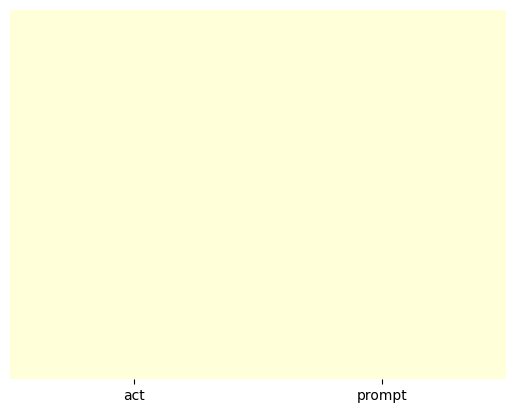

In [11]:
# None visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

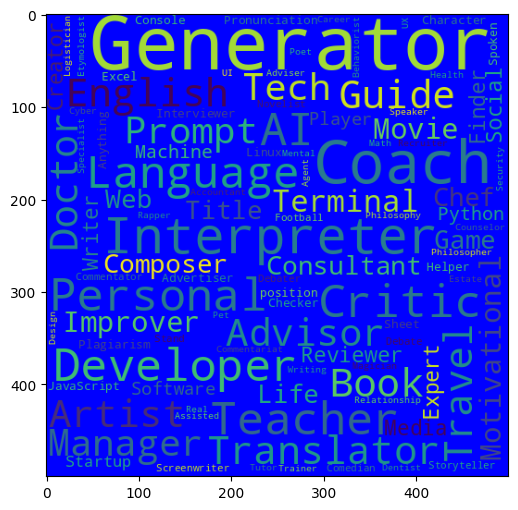

In [12]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='blue')
spam_wc = wc.generate(df['act'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

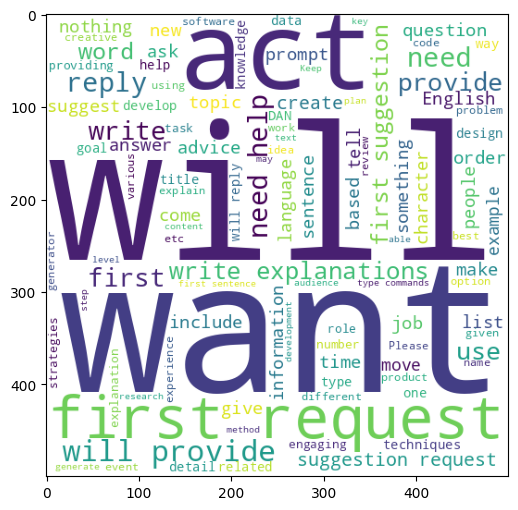

In [13]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df['prompt'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

# Preprocessing

In [14]:
def transform_text(text):
    # Convert the text to lowercase and tokenize it
    tokens = nltk.word_tokenize(text.lower())

    
    # Remove non-alphanumeric tokens (%^# )
    tokens = [t for t in tokens if t.isalnum()]
    
    # Remove stopwords and punctuation (I, how, u, are, is)
    stopwords_set = set(nltk.corpus.stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    tokens = [t for t in tokens if t not in stopwords_set and t not in punctuation_set]
    
    wnl = WordNetLemmatizer()
    lemm_text = [wnl.lemmatize(word) for word in text.lower()] 
    
    # Join the tokens back into a string and return it
    return " ".join(tokens)

# Methods

## Cosine similarity

In [15]:
input_prompt = 'I need some help with English'
input_prompt_transformed = transform_text(input_prompt)
prompts = df['prompt'].tolist()
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the prompts into TF-IDF vectors
prompt_vectors = vectorizer.fit_transform(prompts)

# Transform the input text into a TF-IDF vector
input_vector = vectorizer.transform([input_prompt_transformed])

# Compute the cosine similarity between the input and each prompt
similarity_scores = cosine_similarity(input_vector, prompt_vectors)
# Find the index of the most similar prompt
most_similar_index = similarity_scores.argmax()

# Print the most similar prompt
output_prompt = prompts[most_similar_index]
print(f'Improved output prompt: {output_prompt}')

Improved output prompt: I want you to act as a spoken English teacher and improver. I will speak to you in English and you will reply to me in English to practice my spoken English. I want you to keep your reply neat, limiting the reply to 100 words. I want you to strictly correct my grammar mistakes, typos, and factual errors. I want you to ask me a question in your reply. Now let's start practicing, you could ask me a question first. Remember, I want you to strictly correct my grammar mistakes, typos, and factual errors.


## Transformers

In [16]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained("merve/chatgpt-prompts-bart-long", from_tf=True)
tokenizer = AutoTokenizer.from_pretrained("merve/chatgpt-prompts-bart-long")

def generate(prompt):

    batch = tokenizer(prompt, return_tensors="pt")
    generated_ids = model.generate(batch["input_ids"], max_new_tokens=150)
    output = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
    return output[0]

All TF 2.0 model weights were used when initializing BartForConditionalGeneration.

All the weights of BartForConditionalGeneration were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BartForConditionalGeneration for predictions without further training.


In [17]:
generate("soldier")

'I want you to act as a soldier. My first request is "I need help finding a sniper."'

## Exporting the vectorizer

In [18]:
import pickle
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))